In [35]:
def get_ct_rate_Cl(T):
    """From Cloudy atmdat_char_tran.cpp
    """
    lnT = np.log(T)
    
    a_op = 2.3344302e-10
    b_op = 2.3651505e-10
    c_op = -1.3146803e-10
    d_op = 2.9979994e-11
    e_op = -2.8577012e-12
    f_op = 1.1963502e-13
    k_rec = ((((f_op*lnT + e_op)*lnT + d_op)*lnT + c_op)*lnT + b_op)*lnT + a_op
    
    a_o = -7.6767404e-14
    b_o = -3.7282001e-13
    c_o = -1.488594e-12
    d_o = -3.6606214e-12 
    e_o = 2.0699463e-12
    f_o = -2.6139493e-13
    g_o = 1.1580844e-14
    k_ion = (((((g_o*lnT + f_o)*lnT + e_o)*lnT + d_o)*lnT + c_o)*lnT + b_o)*lnT + a_o
    
    return k_ion, k_rec

def get_ct_rate_KF96(T):
    """Kindon & Ferland 1996"""
    T4 = 1.0e-4*T
    a = 1.04e-9
    b = 3.15e-2
    c = -0.61
    d = -9.73
    
    return a*T4**b*(1.0 + c*np.exp(d*T4))
    
def get_ct_rate_Dr11(T):
    """Draine's fit
    """
    Tinv = 1.0/T
    T4 = 1.0e-4*T
    lnT4 = np.log(T4)
    # Charge exchange rate for recombination 
    k0r = 1.14e-9*T4**(0.4 + 0.018*lnT4)
    k1r = 3.44e-10*T4**(0.451 + 0.036*lnT4)
    k2r = 5.33e-10*T4**(0.384 + 0.024*lnT4)*np.exp(-97.0*Tinv)
    k_rec = k0r + k1r + k2r
    
    # ionization
    k0i = 1.6*k0r*np.exp(-229.0*Tinv)
    k1i = 8.0/3.0*k1r*np.exp(-1.0*Tinv)
    k2i = 8.0*k2r*np.exp(97.0*Tinv)
    k_ion = k0i + k1i + k2i
    
    return k0r, k1r, k2r, k0i, k1i, k2i

## Charge transfer rate coefficients
#### Draine 2011, p. 163 and compare with Fig 7 of Stancil+99

Note that get_ct_rate_Cl is valid only for T> 200K

Text(0.5, 1.0, 'Ionization (H+ + O)')

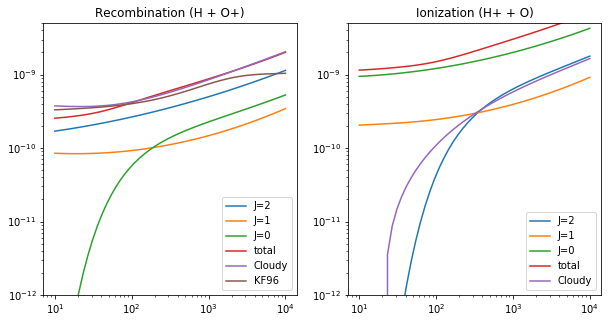

In [50]:
T = np.logspace(1, 4)
k_all = get_ct_rate_Dr11(T)
kr_KF96 = get_ct_rate_KF96(T)
ki_Cl, kr_Cl = get_ct_rate_Cl(T)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.sca(axes[0])
plt.semilogx(T, k_all[0], label='J=2')
plt.semilogx(T, k_all[1], label='J=1')
plt.semilogx(T, k_all[2], label='J=0')
plt.semilogx(T, k_all[0] + k_all[1] + k_all[2], label='total')
#plt.semilogx(T, 5.66e-10*(T/300.0)**0.36*np.exp(-8.60/T), label='HM rates')
plt.semilogx(T, kr_Cl, label='Cloudy')
plt.semilogx(T, kr_KF96, label='KF96')
plt.legend()
plt.yscale('log')
plt.ylim(1e-12, 5e-9)
plt.title('Recombination (H + O+)')

plt.sca(axes[1])
plt.semilogx(T, k_all[3], label='J=2')
plt.semilogx(T, k_all[4], label='J=1')
plt.semilogx(T, k_all[5], label='J=0')
plt.semilogx(T, k_all[3] + k_all[4] + k_all[5], label='total')
plt.semilogx(T, ki_Cl, label='Cloudy')
#plt.semilogx(T, 7.31e-10*(T/300.0)**0.23*np.exp(-225.9/T), label='HM rates')
plt.legend()
plt.yscale('log')
plt.ylim(1e-12, 5e-9)
plt.title('Ionization (H+ + O)')

# Expected ionization fraction (for n < n_crit)
(Cloudy valid only for T>200K)

Text(0, 0.5, '(O+/O)/(H+/H)')

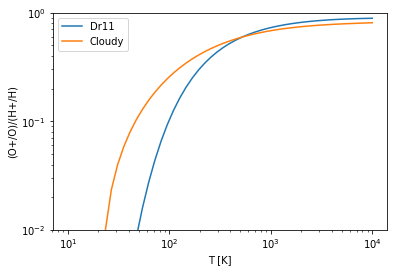

In [51]:
plt.semilogx(T, k_all[3]/(k_all[0] + k_all[1] + k_all[2]), label='Dr11')
plt.semilogx(T, ki_Cl/kr_Cl, label='Cloudy')
plt.legend()
plt.yscale('log')
plt.ylim(1e-2, 1)
plt.xlabel('T [K]')
plt.ylabel('(O+/O)/(H+/H)')